In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import time
from pykrx import stock
import seaborn as sns

import matplotlib
from matplotlib import font_manager, rc
import platform
try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [2]:
def lineplot(df,title=""):
        plt.figure(figsize=(10,8))
        plt.title(title)
        plt.subplot(4,1,1)
        df.최대값.plot(c='red')
        df.최소값.plot(c='blue')
        #plt.title("최대vs최대")
        plt.legend()
        plt.subplot(4,1,2)
        df.평균.plot(c='green')
        df.중앙값.plot(c='orange')
        df['lower'].plot(c='b')
        df['upper'].plot(c='r')
        plt.fill_between(df.index, df['upper'],df['lower'],color='0.9')
        #plt.title("평균,중앙")
        #plt.legend(loc='best')
        plt.subplot(4,1,3)
        df.누적수익률.plot.bar()
        #plt.title("누적수익률")
        plt.legend()
        plt.subplot(4,1,4)
        df.경우의수.plot.bar()
        plt.legend()
        #plt.title("경우의수")

In [6]:
def backtest(code, start='2021-01-01'):
    code = str(code)+".KS"

    df = pdr.get_data_yahoo(code, start=start)
    mean = []
    median = []
    std = []
    max_ = []
    min_ = []
    count=[]
    ret = []
    ks = np.arange(0,1,0.1)+0.1

    df['변동폭'] = df['High'] - df['Low']
    df['내일시가']=df['Open'].shift(-1)
    df['3MA'] = df['Close'].rolling(window=3).mean().shift(1)
    df['3std'] = df['Close'].rolling(window=3).std().shift(1)
    df['upper'] = df['3MA'] + df['3std']*2
    보유수익률 = df["Close"][-1]/df["Close"][0]
    for k in ks:

        df['목표가'] = df['Open']+(df['변동폭'].shift(1))*k
        cond = (df['목표가']<df['High']) & (df['목표가']>df['3MA']) #& (df['목표가']>df['upper'])

        df2=df[cond].copy()
        df2['수익률'] = df2['내일시가']/df2['목표가'] - 0.0032

        평균 = df2.수익률.mean()
        표준편차 = df2.수익률.std()
        중앙값 = df2.수익률.median()
        최대값 = df2.수익률.max()
        최소값 = df2.수익률.min()
        누적수익률 = df2.수익률.cumprod()[-1]
        count.append(df2.shape[0])
        mean.append(평균)
        median.append(중앙값)
        std.append(표준편차)
        max_.append(최대값)
        min_.append(최소값)
        ret.append(누적수익률)
    df= pd.DataFrame({"경우의수":count,"평균":mean,"중앙값":median,"표준편차":std,"최대값":max_,"최소값":min_,"누적수익률":ret},index=ks)
    df['lower']=df['평균']-df['표준편차']/df['경우의수']**(1/2)*1.96
    df['upper']=df['평균']+df['표준편차']/df['경우의수']**(1/2)*1.96
    print("보유수익률 : {:.2f}".format(보유수익률))
    lineplot(df,code)

    return df

보유수익률 : 0.75
누적수익률 : 0.79(k=0.5)
누적수익률 : 1.08(k=1.0)


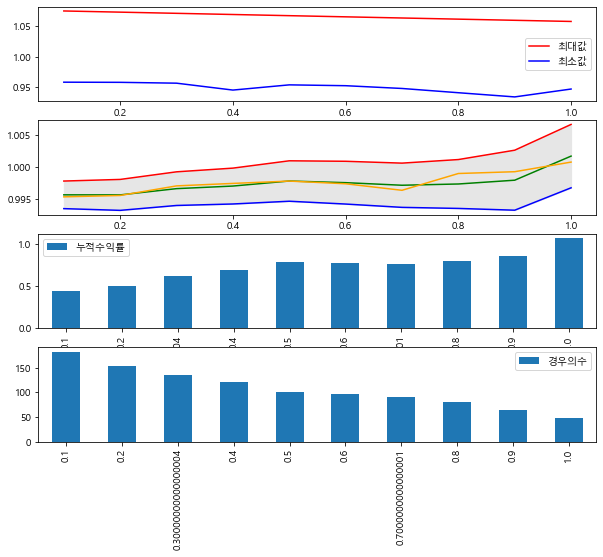

In [8]:
df = backtest("005930",start='2021-01-01')
df
print("누적수익률 : {:.2f}(k=0.5)".format(df.loc[0.5,'누적수익률']))
print("누적수익률 : {:.2f}(k=1.0)".format(df.loc[1,'누적수익률']))

보유수익률 : 0.64
누적수익률 : 0.89(k=0.5)
누적수익률 : 0.98(k=1.0)


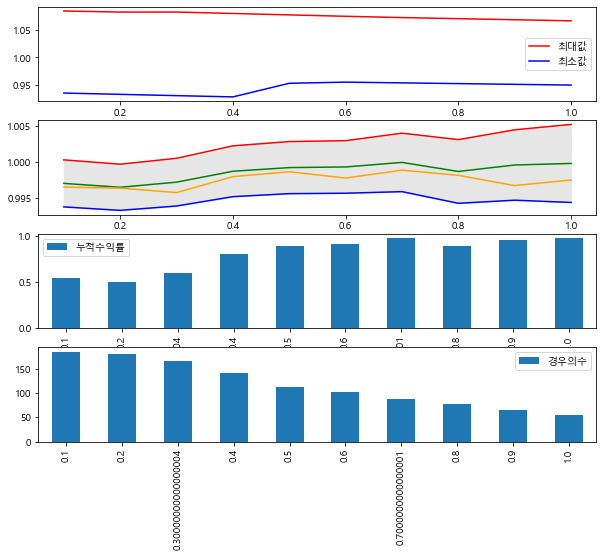

In [12]:
df = backtest("035420",start='2021-01-01')
df
print("누적수익률 : {:.2f}(k=0.5)".format(df.loc[0.5,'누적수익률']))
print("누적수익률 : {:.2f}(k=1.0)".format(df.loc[1,'누적수익률']))

보유수익률 : 0.73
누적수익률 : 0.76(k=0.5)
누적수익률 : 0.97(k=1.0)


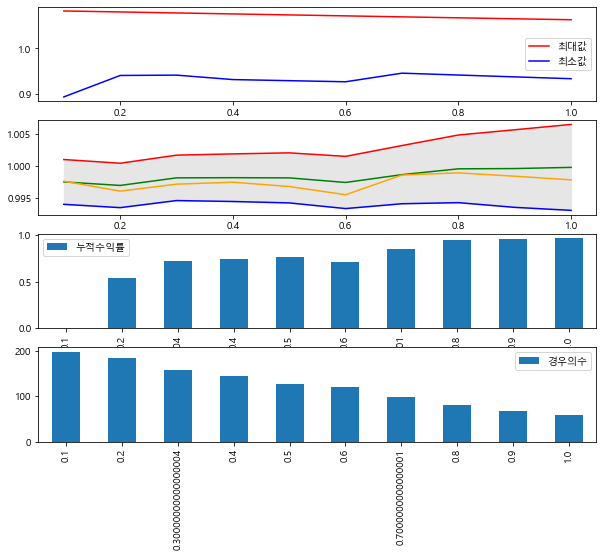

In [13]:
df = backtest("035720",start='2021-01-01')
df
print("누적수익률 : {:.2f}(k=0.5)".format(df.loc[0.5,'누적수익률']))
print("누적수익률 : {:.2f}(k=1.0)".format(df.loc[1,'누적수익률']))